## Lab 3: Let create point maps of traffic accidents in Philadelphia
In the lab 1 and lab 2, we touch a little bit about using geopandas to open the shapefile of the traffic accidents in Philadelphia. This week we are going to know more in-depth info of how to use Python to open shapefile and plot point maps with basemap.

In this lab, you will learn something about read shapefile, the structure of dataframe, plot point map, 
 - Read shapefile, using geopandas to read the traffic accident map
 - Do explorative analysis of the traffic accidents
 - Plot the traffic accident point maps and city limit map
 - Prepare a basemap for the plot

## Step 1: Prepare the shapefile and read shapefiles in geopandas

Download the city limit and the traffic crash data, https://github.com/xiaojianggis/GUS-5073-Geovisualization/tree/master/Lab3-thematicMapping/data. Then you need to unzip these two shapefiles. Then go to your working directory of your `.ipynb`, create a `data` folder, and copy all the files into the `data` folder. If you failed to do this, you code will not be able to find your dataset. 


There are two shapefiles will be used in this lab work, the traffic accidents map, and the city boundary map. Both of these files can be downloaded from my github account. I collected these two files from philadelphia city government's website. For example, you can find the metadata of the accidents map from here, the metadata of the collision crash in Philadelphia is from, http://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c410c6431621f086214c7cd/



## Step 2. Prepare the virtual environment
In this tutorial, we need to create a new virtual environment for the lab. Let first create a new environment, `geospatial`, by `conda create --name geospatial numpy shapely matplotlib rasterio fiona pandas ipython gdal jupyter geopandas` in Anaconda prompt.

Then activate the environment in the Anaconda prompt, `conda activate geospatial`. Install two more module `contextily`, `descartes`. Just type in `pip install contextily` and `pip install descartes` in the Anaconda terminal. After you have this installed successfully, then you can start your Jupyter Notebook by `jupyter notebook` and write your code in the web browser.

In [1]:
!pip install contextily

## Step 3. Let's create Maps

read the city limit shapefile and plot the city limit

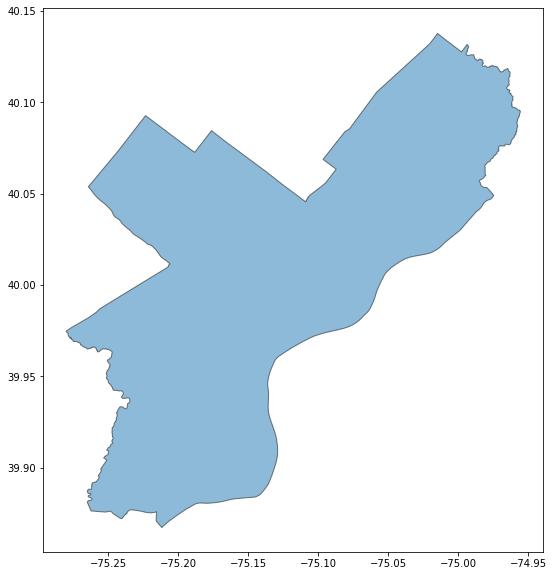

In [3]:
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as ctx

# first Read the city limit of Phily and plot the phily map
city_limit_shp = 'data/city_limit/City_Limits.shp'
phily_limit_df = gpd.read_file(city_limit_shp)

ax = phily_limit_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Check the projection information of the shapefile

In [4]:
phily_limit_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


### Reproject the shapefile


In [5]:
phily_limit_df_2272 = phily_limit_df.to_crs(epsg=2272) ## 2272 is the epsg code of Philadelphia, https://spatialreference.org/ref/epsg/
phily_limit_df_2272.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

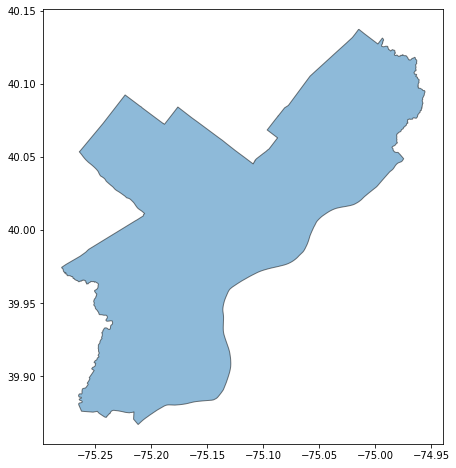

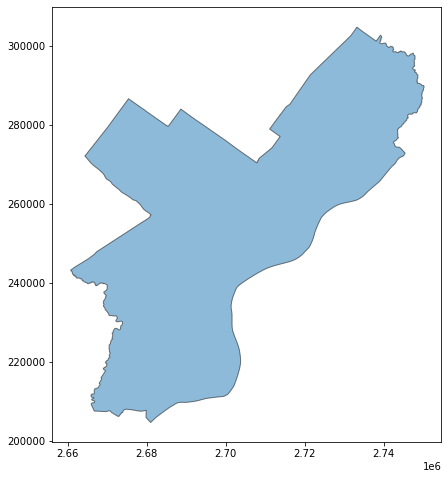

In [7]:
ax = phily_limit_df.plot(figsize=(8, 8), alpha=0.5, edgecolor='k')
ax = phily_limit_df_2272.plot(figsize=(8, 8), alpha=0.5, edgecolor='k')


### Add background tiles to plot

Here we need a new Python module `contextily`. If you have installed it at the beginning, you can run the following cells. If you don't, you need to interupt the Jupyter and install it by typing `pip install contextily` in the Anaconda prompt and then restart the jupyter notebook. However most of the web-based basemap are developed using the epsg 3857( psudo wgs84 projection). Therefore, we need to reproject our map in the 3857.

Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:

We can use add_basemap function of contextily to easily add a background map to our plot. :


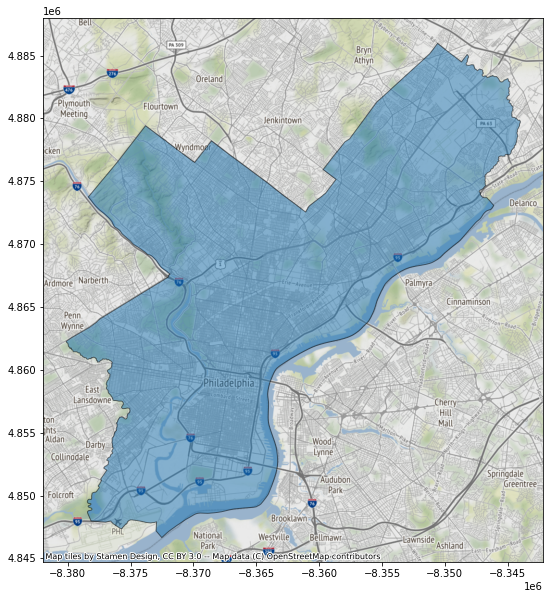

In [8]:
phily_limit_df_3857 = phily_limit_df.to_crs(epsg=3857) ## 3857 the epsg code of web mercator projectionn, https://spatialreference.org/ref/epsg/

ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)


### Set the detail level of the basemap
We can control the detail of the map tiles using the optional zoom keyword (be careful to not specify a too high zoom level, as this can result in a large download). Larger number of zoom means more details.

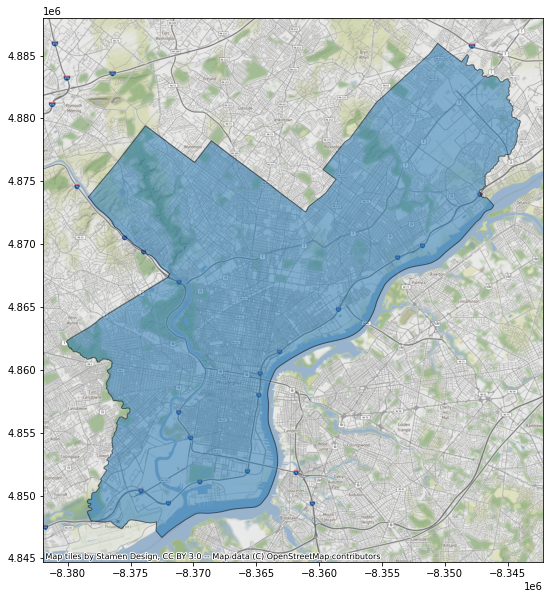

In [9]:
ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=13)

### Using different basemaps
By default, contextily uses the Stamen Terrain style. We can specify a different style using `ctx.providers`:

Options: ctx.providers.xxxxx

`OpenStreetMap.Mapnik`, `OpenStreetMap.Mapnik`, `OpenTopoMap`, `Stamen.Toner`, `Stamen.TonerLite`, `Stamen.Terrain`, `Stamen.TerrainBackground`, `Stamen.Watercolor`, `NASAGIBS.ViirsEarthAtNight2012`, `CartoDB.Positron`, `CartoDB.Voyager`

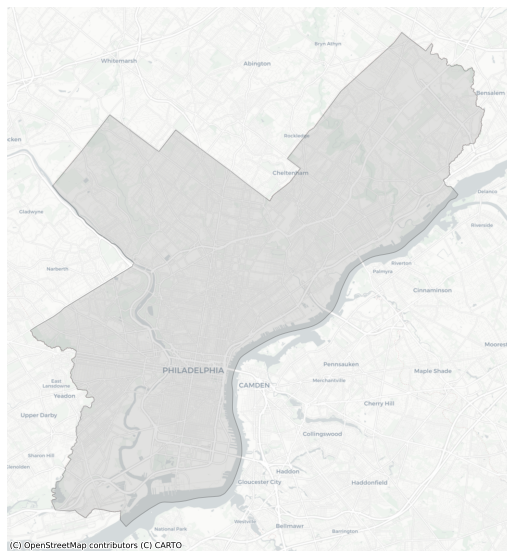

In [8]:
ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.2, edgecolor='k', color='grey')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

In [9]:
ls data

census-tract-data/     city_limit/            crashdata/
census-tract-data.zip  city_limit.zip         crashdata.zip


### Like what we did last lab, we need to read the collision data and map traffic accidents

In [10]:
import geopandas as gpd
from matplotlib import pyplot as plt

# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crashdata/crash_data_collision_crash_2007_2017.shp'

car_crash_df = gpd.read_file(crash_data_shp)


the geopandas will read the shapefile as a data frame with `geometry` column. You can print the first five rows by using `.head()`. This is used to let you check the data structure. 

In [11]:
car_crash_df.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)


### Before creating map, let create visualization to see the data first, the descriptive analysis of the data

Day of the Week code when crash occurred-
1 - Sunday
2 - Monday
3 - Tuesday
4 - Wednesday
5 - Thursday
6 - Friday
7 - Saturday

Create traffic accident map of one year

Text(0.5, 1.0, 'Traffic accident in 2015')

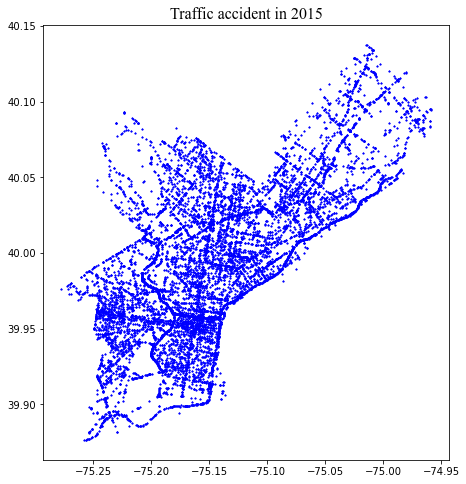

In [12]:
accident_2015 = car_crash_df.loc[car_crash_df['crash_year'] == 2015] #locate the traffic accident in 2015

# prepare the axis and coordinate
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# plot the geopandas dataframe, we read from shapefile
accident_2015.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2015', fontsize='16', fontname='Times New Roman')


In [13]:
car_crash_df.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)


Traffic accident of 2015 and September, `&` means and, `|` means or

Text(0.5, 1.0, 'Traffic accident in 2015')

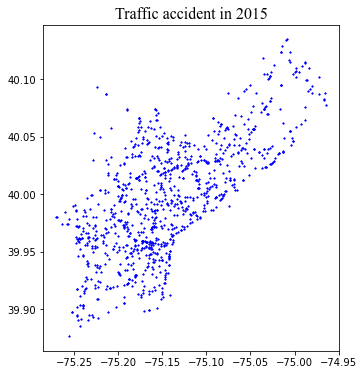

In [14]:
accident_2015_sep = car_crash_df.loc[(car_crash_df['crash_year'] == 2015) & (car_crash_df['crash_mont'] == 9)] #locate the traffic accident in 2015

# prepare the axis and coordinate
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the geopandas dataframe, we read from shapefile
accident_2015_sep.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2015', fontsize='16', fontname='Times New Roman')


### Overlay serveral layers in your geopandas plot
Now we can plot the map of city limit and the traffic accident, together with the basemap

<AxesSubplot:>

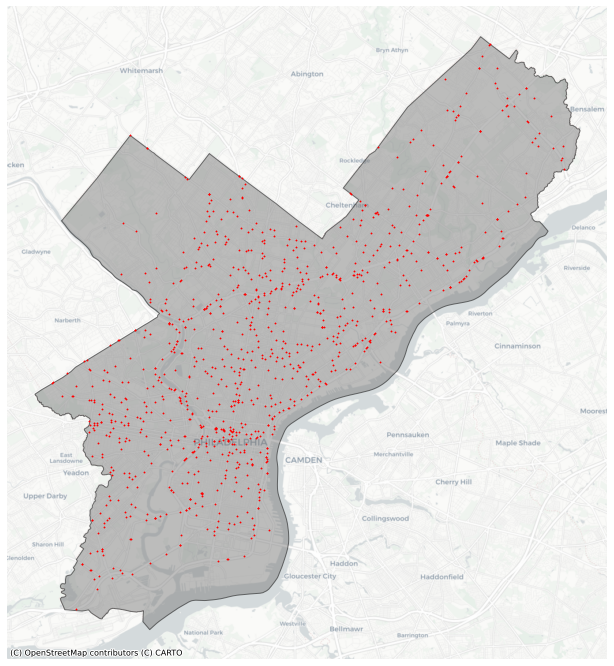

In [15]:
# prepare the plot and the axis
fig, ax = plt.subplots(1, figsize=(12, 12))

# plot the city limit
phily_limit_df_3857.plot(figsize=(10, 10), ax=ax, alpha=0.5, color='grey', edgecolor='k')

# add the basemap to your plot
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()


# plot the traffic accident points
car_crash_df = accident_2015_sep.to_crs(epsg=3857)
car_crash_df.plot(marker='*', ax=ax, color='red', alpha = 1, markersize=1)


### Create maps of different years traffic accidents

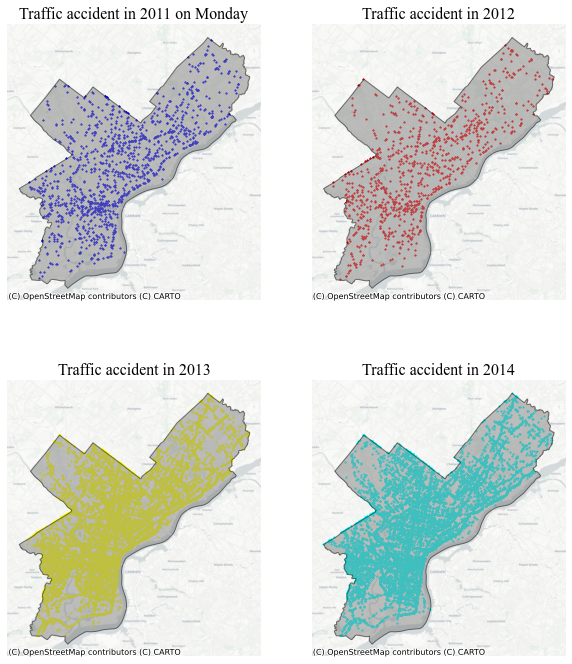

In [16]:

# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crashdata/crash_data_collision_crash_2007_2017.shp'

car_crash_df = gpd.read_file(crash_data_shp)


accident = car_crash_df.to_crs(epsg=3857)

fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# check the accident in 2011 and second day of one week,
accident_yr = accident.loc[(accident['crash_year'] == 2011) & (accident['day_of_wee'] == 2)]
accident_yr.plot(marker='*', ax=ax[0][0], color='blue', markersize=2)
ax[0][0].set_title('Traffic accident in 2011 on Monday', fontsize='16', fontname='Times New Roman')

# plot the city limit
phily_limit_df_3857.plot(ax=ax[0][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][0], source=ctx.providers.CartoDB.Positron)
ax[0][0].set_axis_off()


# accident of 2012 and September
accident_yr = accident.loc[(accident['crash_year'] == 2012) & ((accident['crash_mont'] == 9))]
accident_yr.plot(marker='*', ax=ax[0][1], color='red', markersize=2)
ax[0][1].set_title('Traffic accident in 2012', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[0][1], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][1], source=ctx.providers.CartoDB.Positron)
ax[0][1].set_axis_off()



# accident of 2013
accident_yr = accident.loc[accident['crash_year'] == 2013]
accident_yr.plot(marker='*', ax=ax[1][0], color='yellow', markersize=2)
ax[1][0].set_title('Traffic accident in 2013', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[1][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[1][0], source=ctx.providers.CartoDB.Positron)
ax[1][0].set_axis_off()



# accident of 2014
accident_yr = accident.loc[accident['crash_year'] == 2014]
accident_yr.plot(marker='*', ax=ax[1][1], color='cyan', markersize=2)
ax[1][1].set_title('Traffic accident in 2014', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[1][1], alpha=0.5, color='grey', edgecolor='k')

ctx.add_basemap(ax[1][1], source=ctx.providers.CartoDB.Positron)
ax[1][1].set_axis_off()


### Overlay multiple shapefiles together


In [17]:
ls data/census-tract-data

census-tract-data.cpg  census-tract-data.prj  census-tract-data.shp
census-tract-data.dbf  census-tract-data.qpj  census-tract-data.shx


In [18]:
import geopandas as gpd
censusMap = gpd.read_file("data/census-tract-data/census-tract-data.shp")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
accident_yr.crs, censusMap.crs

(<Projected CRS: EPSG:3857>
 Name: WGS 84 / Pseudo-Mercator
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: World - 85°S to 85°N
 - bounds: (-180.0, -85.06, 180.0, 85.06)
 Coordinate Operation:
 - name: Popular Visualisation Pseudo-Mercator
 - method: Popular Visualisation Pseudo Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [24]:
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')

accident_yr_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
34175,None,34176,405616,2014049838,6,67,67301,2014,3,6,...,0,0,0,8,0,40.0290,-75.1061,None,None,POINT (-75.10610 40.02900)
34176,None,34177,405617,2014049892,6,67,67301,2014,4,3,...,0,0,0,8,0,39.9866,-75.2052,None,None,POINT (-75.20520 39.98660)
34177,None,34178,405618,2014052474,6,67,67301,2014,5,7,...,0,0,0,0,0,39.9584,-75.1807,None,None,POINT (-75.18070 39.95840)
34178,None,34179,405625,2014059008,6,67,67301,2014,5,6,...,0,0,0,8,0,39.9956,-75.1725,None,None,POINT (-75.17250 39.99560)
34179,None,34180,405632,2014068002,6,67,67301,2014,5,6,...,0,0,0,8,0,40.0576,-75.0765,None,None,POINT (-75.07650 40.05760)


### Overlap the car accident data to the census tract map

<AxesSubplot:>

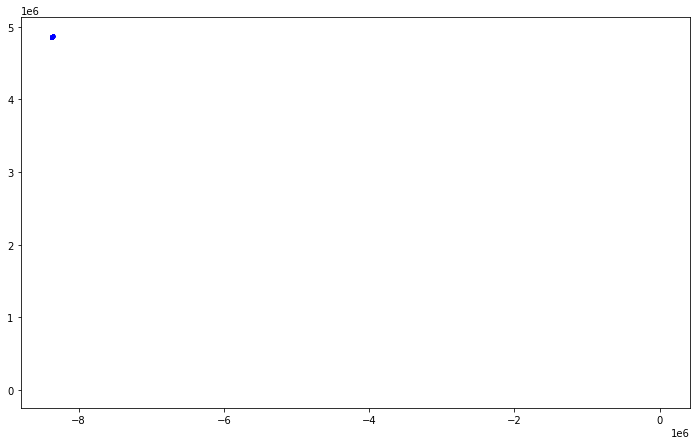

In [38]:
fig, ax = plt.subplots(1, figsize=(12,12))

censusMap.plot(ax=ax, color='white', edgecolor='black')

accident_yr.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

### Plot these two maps

<AxesSubplot:>

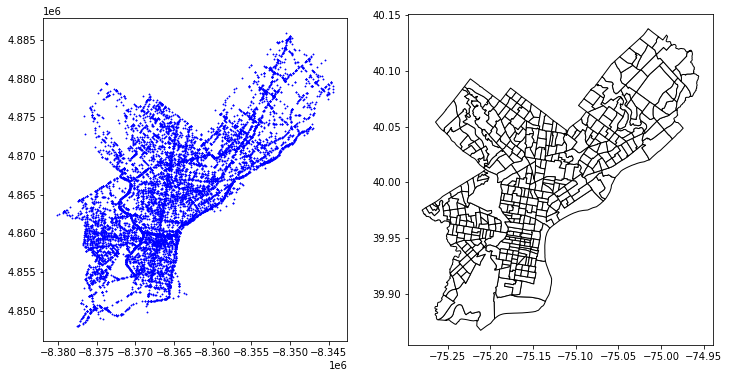

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))

censusMap.plot(ax=ax[1], color='white', edgecolor='black')

accident_yr.plot(marker='*', 
                   ax=ax[0], 
                   color='blue', 
                   markersize=1)

### There are in different projections, you need to reproject the shapefile in the same projection

<AxesSubplot:>

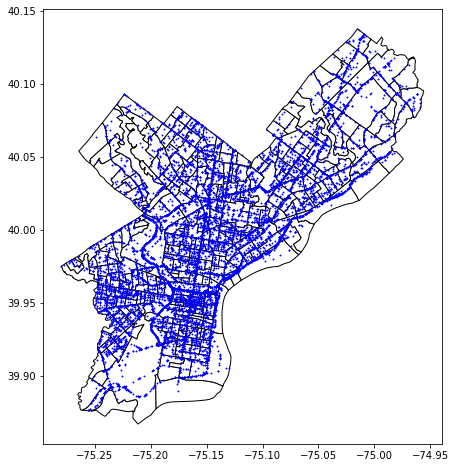

In [43]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

censusMap.plot(ax=ax, color='white', edgecolor='black')
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')
accident_yr_reprojected.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

In [24]:
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')

accident_yr_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
34175,None,34176,405616,2014049838,6,67,67301,2014,3,6,...,0,0,0,8,0,40.0290,-75.1061,None,None,POINT (-75.10610 40.02900)
34176,None,34177,405617,2014049892,6,67,67301,2014,4,3,...,0,0,0,8,0,39.9866,-75.2052,None,None,POINT (-75.20520 39.98660)
34177,None,34178,405618,2014052474,6,67,67301,2014,5,7,...,0,0,0,0,0,39.9584,-75.1807,None,None,POINT (-75.18070 39.95840)
34178,None,34179,405625,2014059008,6,67,67301,2014,5,6,...,0,0,0,8,0,39.9956,-75.1725,None,None,POINT (-75.17250 39.99560)
34179,None,34180,405632,2014068002,6,67,67301,2014,5,6,...,0,0,0,8,0,40.0576,-75.0765,None,None,POINT (-75.07650 40.05760)


## Homework - Create map of car crashes in different years
- Create the map of car crash in in 2015 on Monday, 2016 on Monday, and 2017 on Monday
- Use different colors for years of 2015, 2016, and 2017
- Reproject the traffic accident data and census tract data into projection with epsg of 2272 and overlay them together


Hint: 

`crash15 = car_crash_df.loc[car_crash_df['crash_year']==2015]`

`crash15_monday = crash15.loc[crash15['day_of_wee']==2]`

Using and operator `&`

Use `to_crs` to reproject the dataframe


### Reference
1. Geopandas for mapping, https://geopandas.org/gallery/plotting_basemap_background.html
2. Context geo tiles in Python, https://contextily.readthedocs.io/en/latest/providers_deepdive.html